<a href="https://colab.research.google.com/github/KaggleUser93/TensorFlow_AI/blob/master/TF_Proj2_ZalandoFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Zalando fashion images classification 
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape


(10000, 28, 28)

In [0]:
len(test_labels)


10000

In [0]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

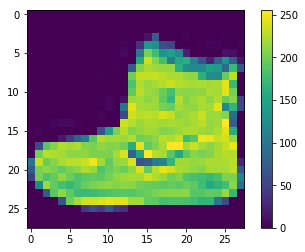

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

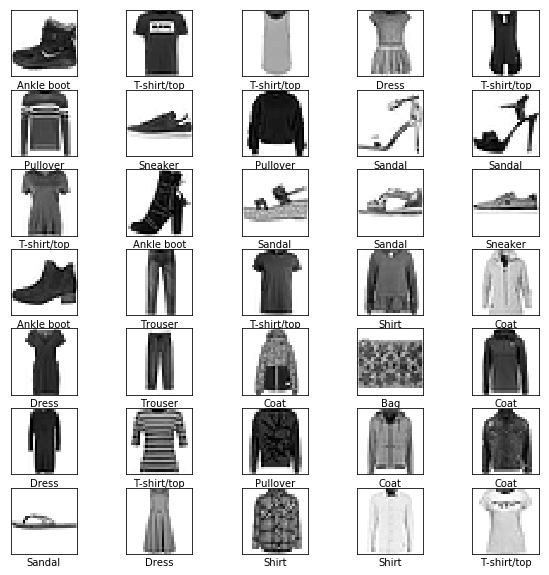

In [0]:
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(7,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.4955 - acc: 0.8257
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3768 - acc: 0.8637
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3374 - acc: 0.8777
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3142 - acc: 0.8850
Epoch 5/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2950 - acc: 0.8920
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2798 - acc: 0.8964
Epoch 7/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2670 - acc: 0.9015
Epoch 8/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2556 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2466 - acc: 0.9080
Epoch 10/10
60000/60000 [==============================] - 8s 130us/sampl

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3436 - acc: 0.8812
Test accuracy: 0.8812


In [0]:
predictions = model.predict(test_images)


In [0]:
predictions[0]

array([3.4223507e-07, 1.9389176e-12, 2.4289390e-08, 4.1767624e-08,
       5.0314983e-09, 1.1211306e-02, 1.5601915e-06, 3.4714848e-02,
       8.5950589e-08, 9.5407176e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

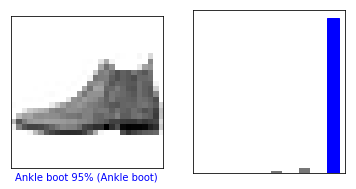

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

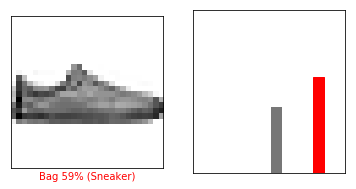

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

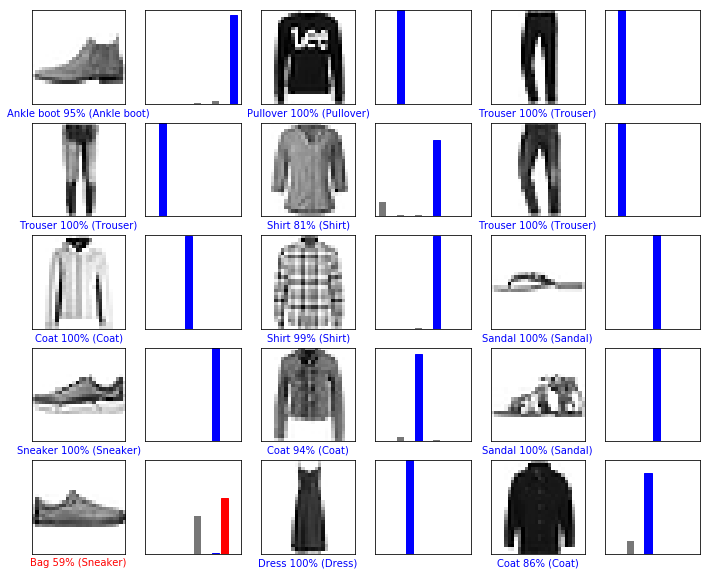

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


[[3.42235069e-07 1.93892840e-12 2.42893439e-08 4.17676240e-08
  5.03149833e-09 1.12113375e-02 1.56019303e-06 3.47148031e-02
  8.59504183e-08 9.54071760e-01]]


9

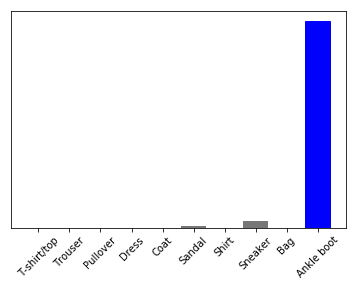

In [0]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 15s 256us/sample - loss: 0.2192 - acc: 0.9353
Epoch 2/5
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0981 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0697 - acc: 0.9775
Epoch 4/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0558 - acc: 0.9819
Epoch 5/5
10000/10000 [==============================] - 1s 59us/sample - loss: 0.0722 - acc: 0.9797


[0.07224976748714688, 0.9797]

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

!pip install numpy==1.16.1
import numpy as np

print(tf.__version__)

     |████████████████████████████████| 17.3MB 4.9MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


1.13.1
